# Week 8: Monte Carlo Basics

After a really cool talk about the power of the Monte Carlo method, let's step back and build some codes to see how it's used in practice.

Some useful tools:
1. [`np.random.uniform(low, high, size)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.uniform.html)
2. [`np.random.normal(mu, sigma, size)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

## Exercise 1

You have laid out a (peat/mud/rock/ice) core and are measuring the thicknesses of the layers you've identified. Layer B is on top of layer A.  Your measuring tape is laid out next to the core, and you've decided you can read it to the nearest mm.  The reading at the bottom of layer A is 8 mm, the bottom of layer B is 12 mm, and the top of layer B is 15 mm. 

1. How would you express your uncertainty in the position of the base of layer A?  What probability distribution would you use to describe it? How about the bottom of layer B?
2. What is the thickness of layer A? What is your uncertainty in that estimate? How would you express that uncertainty numerically? How would you express that uncertainty graphically?
3. What is the thickness of layer B and its uncertainty? What is the total thickness of both layers and its uncertainty?
4. Bonus: Make a scatter plot of your simulations of the layer A and layer b thicknesses. What do you observe?

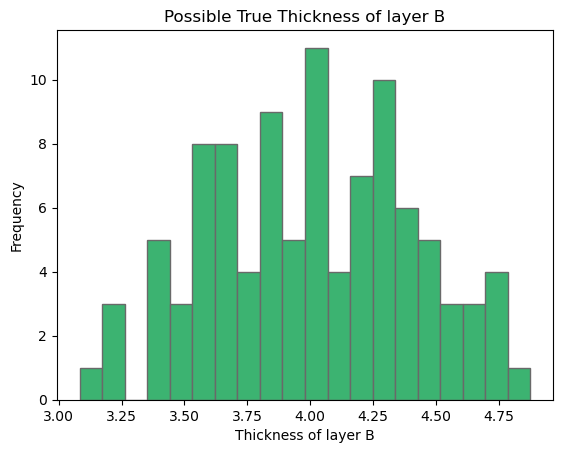

standard deviation of Layer A thickness: 0.4036201053201411
mean thickness of Layer A: 4.004925246094024


In [68]:
# 1. Decide what we think a reasonable uncertainty is, and generate random numbers within that spread (uniform distrobution, ± 0.5 mm bounds)

import numpy as np
import matplotlib.pyplot as plt

# make a function so we don't have to keep copy/pasting stuff! (samples is what we call numbers for the Monte Carlo simulation)

def generate_samples(measurement, uncertainty, nMC):
    # inputs: measurements, uncertainty, number of monte carlo trials
    # outputs: array of samples
    #uncertainty is the full width of a uniform distrobution
    samples = np.random.uniform(
        measurement - 0.5*uncertainty, 
        measurement + 0.5*uncertainty, 
        int(nMC) # use the integer function to make sure inputs are always integers instead of float
    ) # millimeters
    return samples

# define our variables

base_A = 8 # mm
base_B = 12 # mm
top_B = 15 # mm

dist_unct = 1 #mm
nMC = 100 # number of random Monte Carlo simulations

# generate Monte Carlo samples of distance measurements to horizons
distance_base_A = generate_samples(base_A, dist_unct, nMC)
distance_base_B = generate_samples(base_B, dist_unct, nMC)
distance_top_B = generate_samples(top_B, dist_unct, nMC)

# 2. Find thickness of layer A, using our previously calculated uncertainty spreads. Generates 100 numbers that it COULD be

thickness_A = distance_base_B - distance_base_A

# 3. Find thickness of layer A, using our previously calculated uncertainty spreads. Generates 100 numbers that it COULD be

thickness_B = distance_top_B - distance_base_B

# 4. Make a histogram!
plt.hist(thickness_A, bins=20, color='mediumseagreen', edgecolor='dimgray')

#Make it pretty
plt.xlabel('Thickness of layer B')
plt.ylabel('Frequency')
plt.title('Possible True Thickness of layer B')
plt.show()

#np.mean(thickness_A)
print("standard deviation of Layer A thickness:", np.std(thickness_A))
print("mean thickness of Layer A:", np.mean(thickness_A))

## Exercise 2

You've decided to do some geochronology, and the age at the bottom of layer A is 10.0 ± 1.1 ka and the age at the top of layer A is 6.2 ± 1.2 ka. The unit "ka" is the abbreviation for "thousands of years ago." Treat these as normal distributions with the uncertainties reported at two standard deviations (i.e., $\pm 2 \sigma $).

1. How long did it take to deposit layer A? What is the uncertainty in that duration?
2. What is the average depositional rate for layer A? What is the uncertainty in that rate?
3. You've measured a new date at the top of layer B, at 3.2 ± 0.9 ka. What is the depositional rate and uncertainty for layer B? What was the average depositional rate and uncertainty for layers A and B together?

## Exercise 3

A basaltic lava flow has been offset by movement on a fault you're interested in. You can clearly identify the edge of the flow and observe that the offset is 121 ± 16 m. You interpret that uncertainty as a uniform distribution, with the ± 16 m as the endpoints of the distribution. The age of the lava flow has been measured at 4.0 ± 1.4 ka $(2\sigma)$. How fast is the fault moving, in cm/year, and what's the uncertainty in that rate? Provide a historgram.

## Exercise 4: Suspicious Data

You've made six very difficult measurements and are now looking at your data.  The first three are above the mean of the data and the last three are below the mean.  What's the probability that this pattern would happen by chance? Do you think the data are somehow biased?